# This Capstone is based on Airline arrival/departure data at 300+ airports across the country. It also includes Analysis on Flight cancellations and delays.

### 1. We often hear complaints about flights being delayed or cancelled causing inconvenience to travelers, suggesting it to be a frequent occurence. Is this true? Is this a function of a specific Airline, is it due to specific airports one is flying out of or is it due to specific airport one is flying into?

### 2. How do different Airlines fare with regard to cancelled flights?

### 3. What percentage of flights delayed by an hour or more? Are some airlines affected more than other airlines?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The file is about 650MB in size with about 7 million rows

In [2]:
df= pd.read_csv('2008_1.csv')

In [54]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'TotDelay', 'TimeInMotion'],
      dtype='object')

The following code wrangles the data by replacing null values with zeros, adding a column combining arrival and departure delays and also show some basic stats regarding the data

In [4]:

df['TotDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']

In [5]:
df['TimeInMotion']= df['AirTime'] + df['TaxiIn'] + df['TaxiOut']

In [6]:
df.fillna(0.0,inplace=True)

df['TotDelay'] = df['ActualElapsedTime'] - df['CRSElapsedTime']


In [7]:
print(" Unique Airlines" , len(df.UniqueCarrier.unique()) ,"\t\t\n", "Total Number of Flights", len(df.FlightNum.unique()),"\n", "Total Number of Unique Planes" , len(df.TailNum.unique()),"\n", "Total Number of Originating Airports" ,len(df.Origin.unique()),"\n", "Total Number of Destination Airports" ,len(df.Dest.unique()))

 Unique Airlines 20 		
 Total Number of Flights 7539 
 Total Number of Unique Planes 5374 
 Total Number of Originating Airports 303 
 Total Number of Destination Airports 304


In [8]:
df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay,TimeInMotion
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-22.0,128.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-17.0,128.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,96.0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-2.0,88.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,0,0,2.0,0.0,0.0,0.0,32.0,0.0,90.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-14.0,101.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,0,0,0,10.0,0.0,0.0,0.0,47.0,-10.0,240.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-17.0,233.0
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,0,0,0.0,0.0,0.0,0.0,0.0,-16.0,79.0


## 1. The following Analysis is to determine is specific Airlines, Originating Airport or Destination Airport are the cause of considerable delay.

In [9]:
df_al_stat =df[['UniqueCarrier','TotDelay']]

df_al_stat_90 = pd.DataFrame(df_al_stat.groupby('UniqueCarrier').quantile(.90).reset_index().sort_values('TotDelay'))
df_al_stat_75 = pd.DataFrame(df_al_stat.groupby('UniqueCarrier').quantile(.75).reset_index().sort_values('TotDelay'))

df_al_merged = pd.DataFrame(pd.merge(df_al_stat_75,df_al_stat_90,on = 'UniqueCarrier'))

#### The above shows statistics by airline. However, since the data is by airline codes, it is helpful to decode. The cross reference of airline codes and names is loaded into df_al DataFrame

In [10]:
airline_series = np.array([
    ['1D','Radixx'],['9E','Pinnacle Airlines'],['AA','American Airlines'],['AQ','Aloha Airlines'],['AS','Alaska Airlines, Inc.'],['B6','JetBlue Airways'],['BB','Seaborne Airlines'],['CO','Continental Airlines'],['DL','Delta Air Lines'],['EV','ExpressJet'],['F9','Frontier Airlines'],['FL','AirTran Airways'],['HA','Hawaiian Airlines'],['MQ','American Eagle Airlines'],['NW','Northwest Airlines'],['OH','Comair'],['OO','SkyWest Airlines'],['UA','United Airlines'],['US','US Airways'],['WN','Southwest Airlines'],['XE','Jet Suite X'],['YV','Mesa Airlines']
])
df_al = pd.DataFrame(airline_series, columns=['UniqueCarrier','Airline'])

#### The following code merges the cross reference DataFrame with df_al and the statistics are provided below

In [11]:
df_Carrier_stat = pd.DataFrame((pd.merge(df_al, df_al_merged, on='UniqueCarrier')))
df_Carrier_stat.rename(columns={'TotDelay_x': '75th percentile','TotDelay_y': '90th percentile'}, inplace=True)

df_Carrier_stat_by75 = df_Carrier_stat.sort_values('75th percentile')

df_Carrier_stat_by90 = df_Carrier_stat.sort_values('90th percentile')

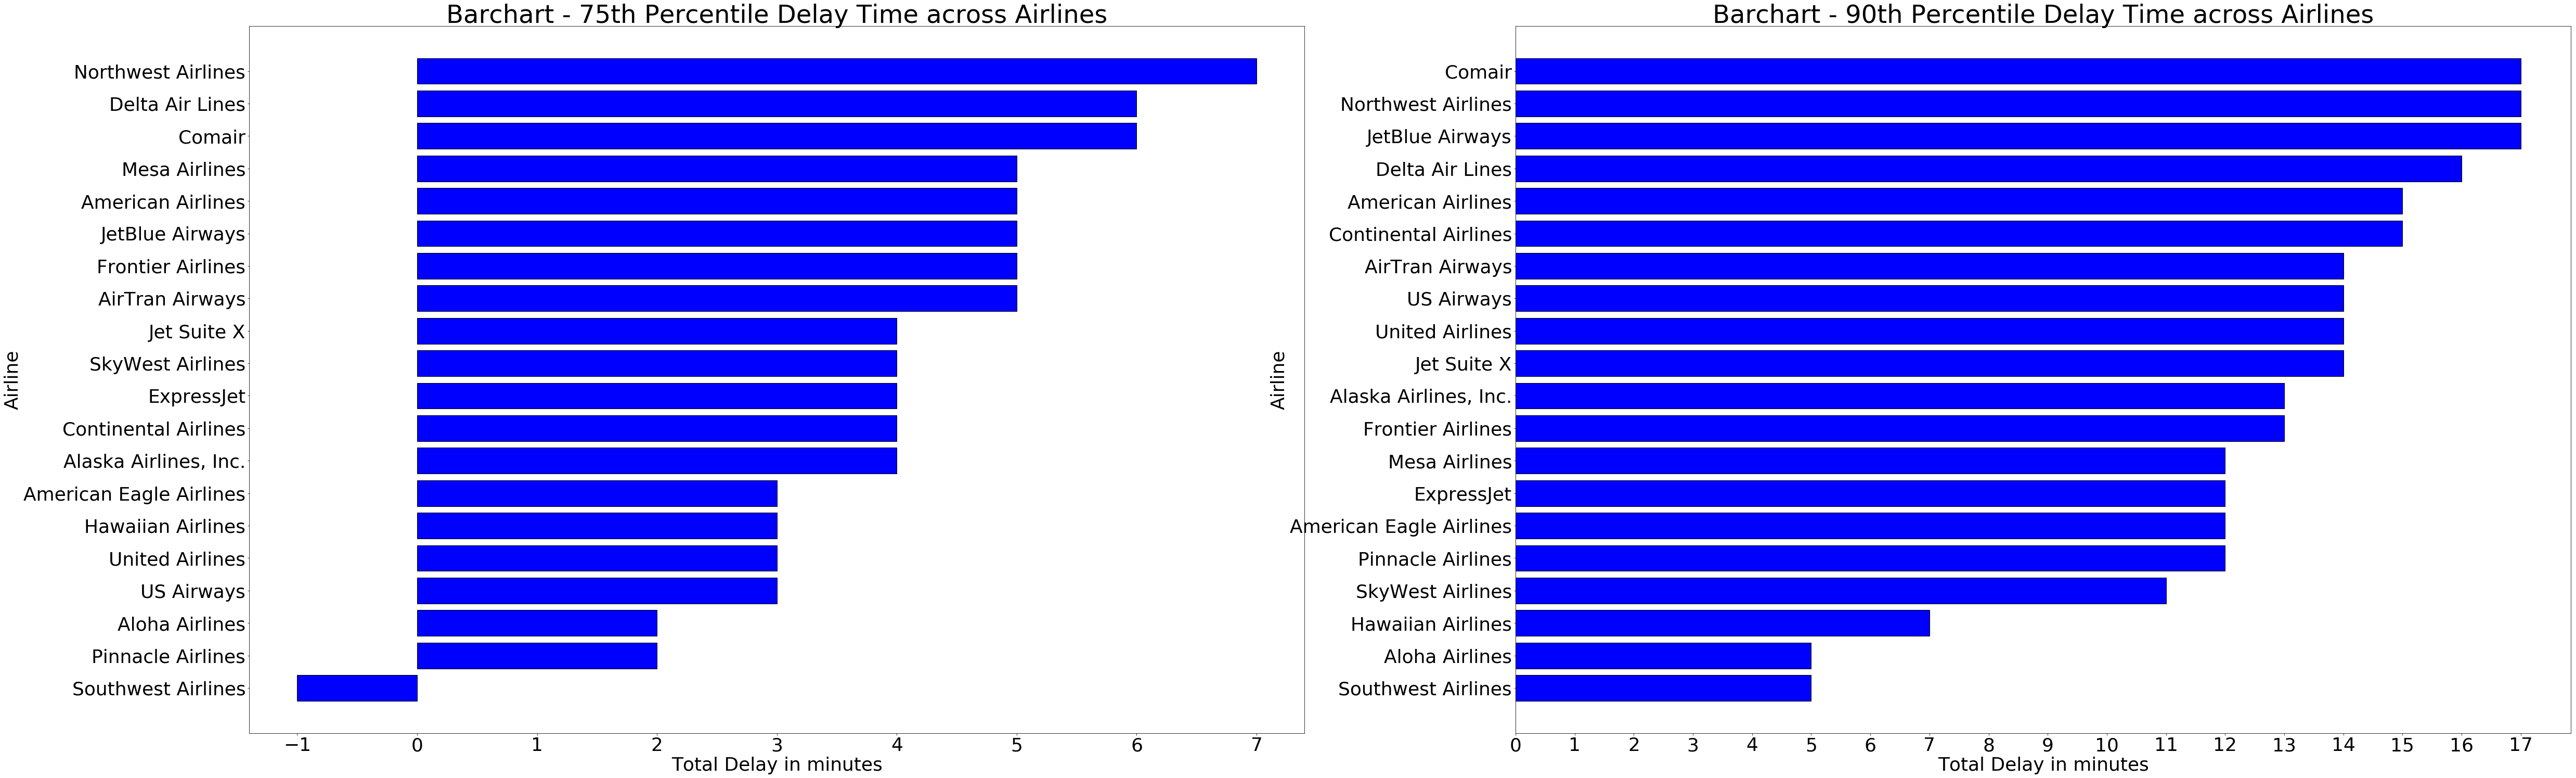

In [12]:
plt.figure(figsize=(80, 25))
Airlines=df_Carrier_stat_by75['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
Delay_in_minutes=df_Carrier_stat_by75['75th percentile']
xpos = np.arange(min(Delay_in_minutes),max(Delay_in_minutes)+1,1)
 
plt.subplot(1,2,1) 

plt.barh(pos,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=36)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Barchart - 75th Percentile Delay Time across Airlines',fontsize=48)


Airlines=df_Carrier_stat_by90['Airline']
ypos = np.arange(len(Airlines))
Delay_in_minutes=df_Carrier_stat_by90['90th percentile']
xpos = np.arange(0,max(Delay_in_minutes)+1,1)
 
plt.subplot(1,2,2)
plt.barh(pos,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=36)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Barchart - 90th Percentile Delay Time across Airlines',fontsize=48)
plt.show()

#### Looking at the graph, surprisingly  75% of the flights for any airline are delayed at most by 7 minutes! So, by and large the flights are on time. Southwest wins by being the only airline for which 75% of the flights are early by a minute or more! 
####  Also 90% of the flights for any airline are delayed at most by 17 minutes! So, by and large the flights are on time. Southwest wins again by being one of the the only two airlines where 90% of the flights are mere 5 minutes late!

In [13]:
df_O_TotDelay_90 = pd.DataFrame(df.groupby('Origin')['TotDelay'].quantile(.90).reset_index().sort_values('TotDelay'))
df_O_TotDelay_75 = pd.DataFrame(df.groupby('Origin')['TotDelay'].quantile(.75).reset_index().sort_values('TotDelay'))

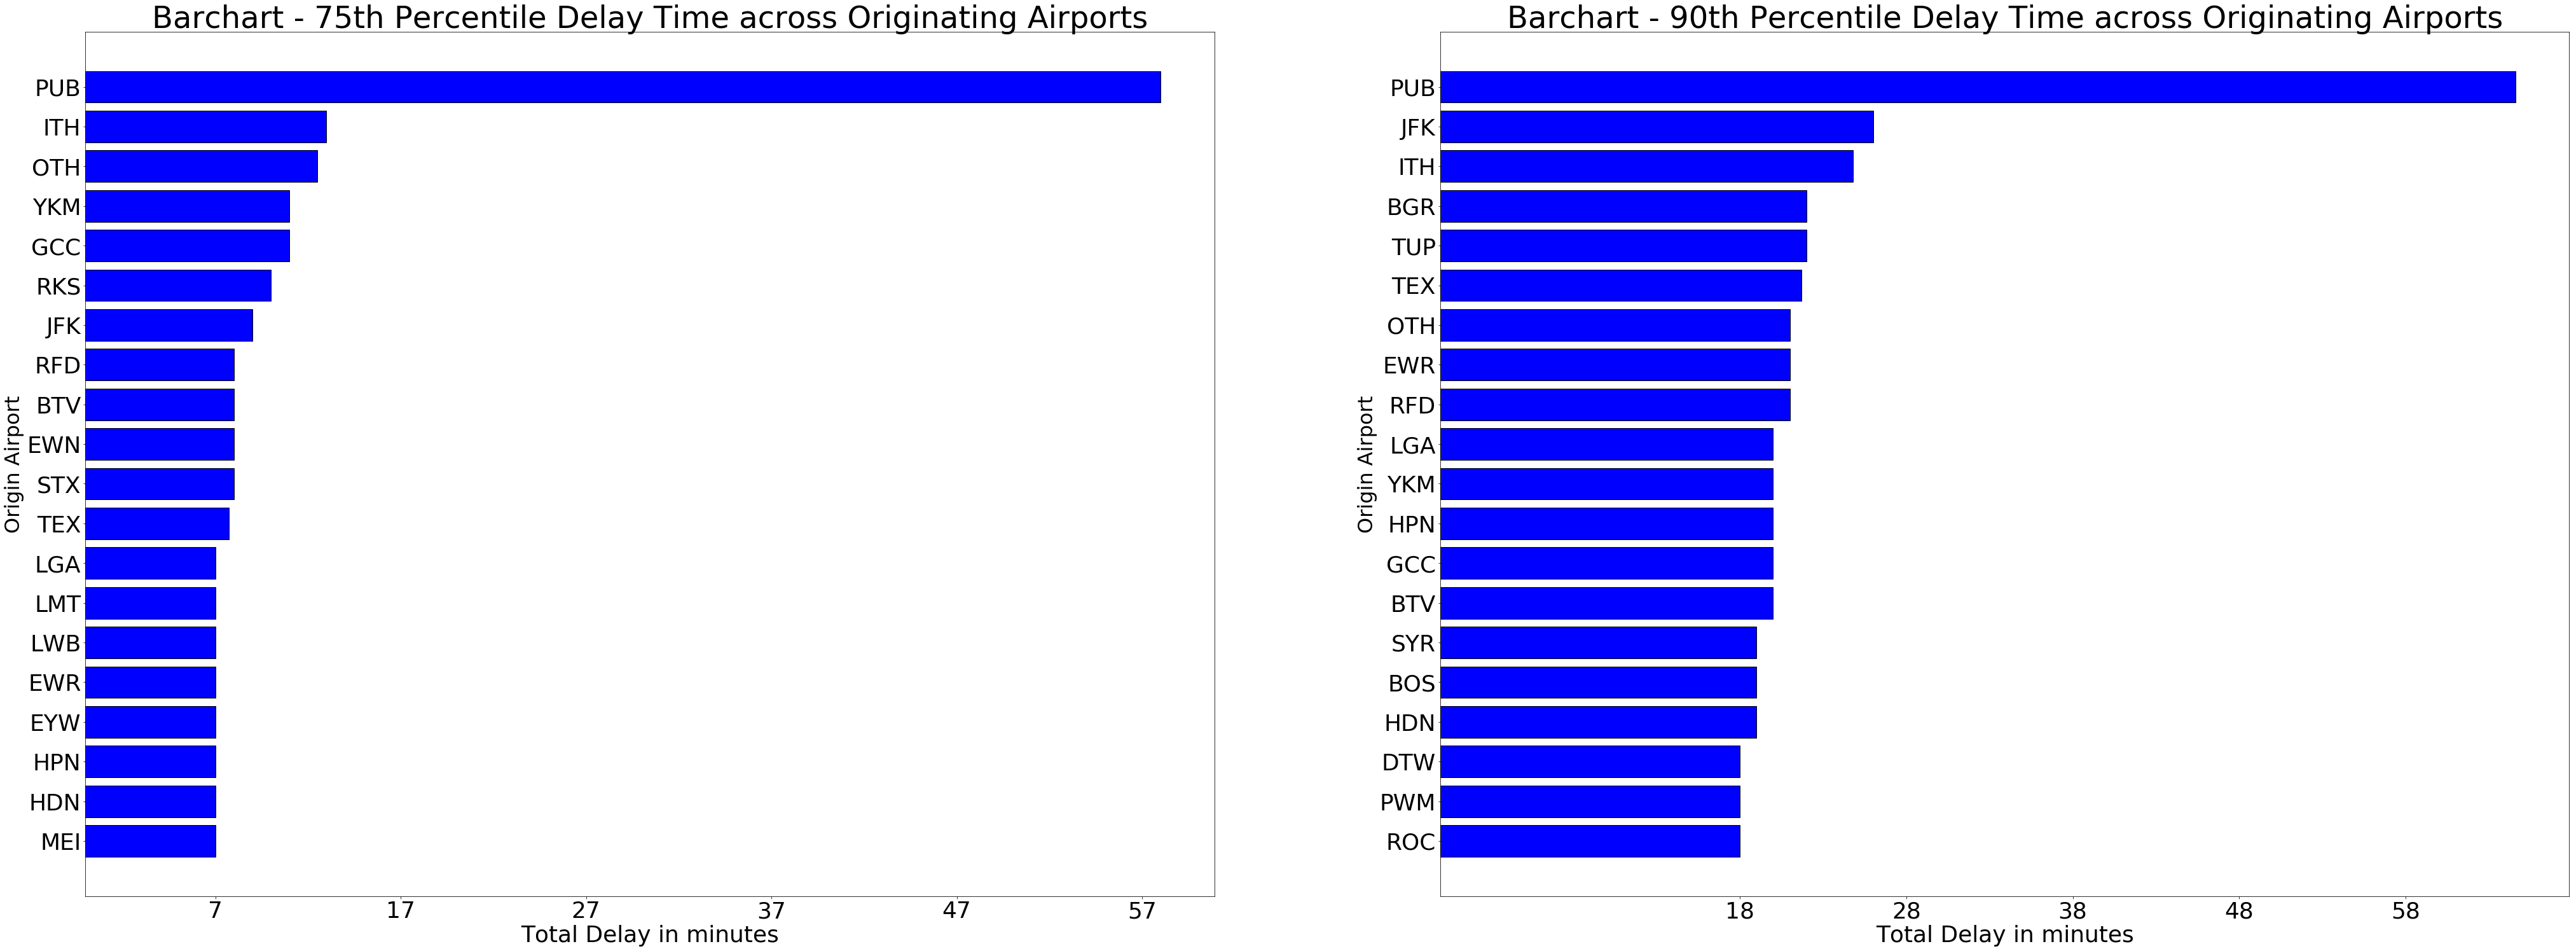

In [14]:
plt.figure(figsize=(70, 25))

Airports=df_O_TotDelay_75['Origin'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_O_TotDelay_75['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),10)

plt.subplot(1,2,1)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Origin Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 75th Percentile Delay Time across Originating Airports',fontsize=48)

Airports=df_O_TotDelay_90['Origin'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_O_TotDelay_90['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),10)

plt.subplot(1,2,2)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Origin Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 90th Percentile Delay Time across Originating Airports',fontsize=48)
plt.show()


#### Similar question on whether a particluar originating airport could be the reason for delayed flights  shows according to the above graph, that except for a handful of airports(out of 300+), in all other cases 75% of the flights were less than 10 minutes late. Also except for a handful of airports(out of 300+), in all other cases 90% of the flights were less than 20 minutes late.

In [15]:
df_D_TotDelay_90 = pd.DataFrame(df.groupby('Dest')['TotDelay'].quantile(.90).reset_index().sort_values('TotDelay'))
df_D_TotDelay_75 = pd.DataFrame(df.groupby('Dest')['TotDelay'].quantile(.75).reset_index().sort_values('TotDelay'))

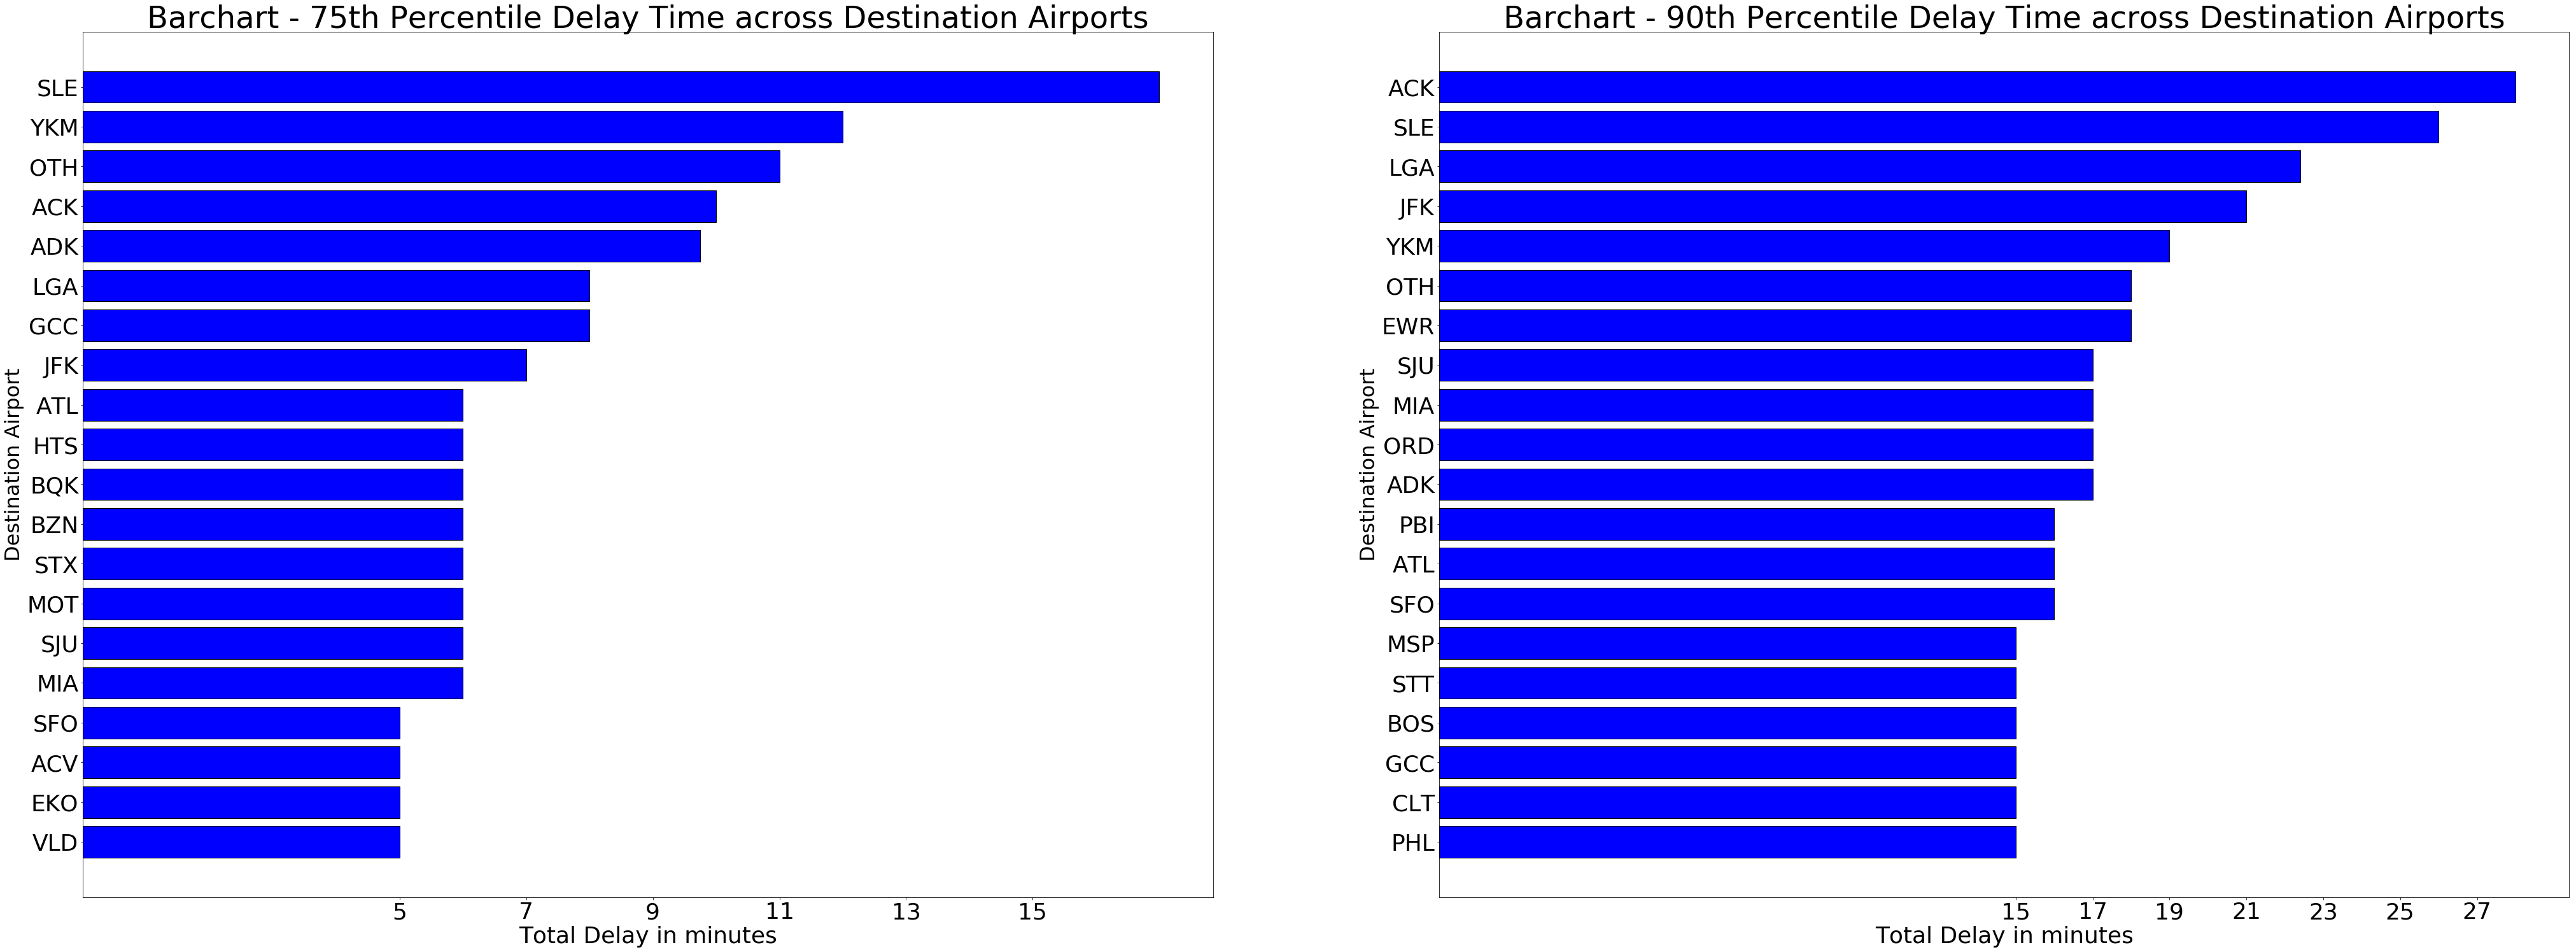

In [16]:
plt.figure(figsize=(70, 25))

Airports=df_D_TotDelay_75['Dest'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_D_TotDelay_75['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),2)

plt.subplot(1,2,1)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Destination Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 75th Percentile Delay Time across Destination Airports',fontsize=48)

Airports=df_D_TotDelay_90['Dest'].tail(20)
posy = np.arange(len(Airports))
Delay_in_minutes=df_D_TotDelay_90['TotDelay'].tail(20)
posx = np.arange(min(Delay_in_minutes),max(Delay_in_minutes),2)

plt.subplot(1,2,2)  
plt.barh(posy,Delay_in_minutes,color='blue',edgecolor='black')
plt.yticks(posy, Airports,fontsize=36)
plt.xlabel('Total Delay in minutes', fontsize=36)
plt.ylabel('Destination Airport', fontsize=32)
plt.xticks(posx, fontsize=36)
plt.title('Barchart - 90th Percentile Delay Time across Destination Airports',fontsize=48)
plt.show()

Similar question on whether a particluar destination airport could be the reason for delayed flights shows according to the above graph, that except for a handful of airports(out of 300+), in all other cases 75% of the flights were less than 10 minutes late.
Also, except for a handful of airports(out of 300+), in all other cases 90% of the flights were less than 15 minutes late.

## So, we can conclude that most flights were less than 15 minutes late and were not affected by the airline, originating or destination airports.

## 2. The following analysis tries to figure out if a particular airline is more prone to cancellation than others

#### df_cancelled DataFrame is a slice of cancelled flights from the main data file. df_cancelled_trunc slices a couple of columns from the dataset to compare with the total flights from df_al_stat_trunc

In [17]:
cancelled_flight = df['Cancelled'] == 1
df_cancelled = pd.DataFrame(df[cancelled_flight].groupby('UniqueCarrier').count().reset_index())
df_cancelled.rename(columns={'Year': 'cancel_count'}, inplace=True)

df_cancelled_trunc = df_cancelled[['UniqueCarrier','cancel_count']]
###############################

df_al_stat_grp = pd.DataFrame(df_al_stat.groupby('UniqueCarrier').count().reset_index())

df_al_stat_grp.rename(columns={'TotDelay': 'total_count'}, inplace=True)

df_al_stat_trunc = df_al_stat_grp[['UniqueCarrier','total_count']]
#####################################

pd_cancelled_stat = pd.DataFrame(pd.merge(df_cancelled_trunc, df_al_stat_trunc))

pd_cancelled_stat['Perc'] = round((pd_cancelled_stat['cancel_count']/pd_cancelled_stat['total_count'])*100,2)

pd_cancelled_stat_by_airline= pd.DataFrame(pd.merge(pd_cancelled_stat,df_al,on='UniqueCarrier').sort_values(['Perc'],ascending=[False]))
#########################

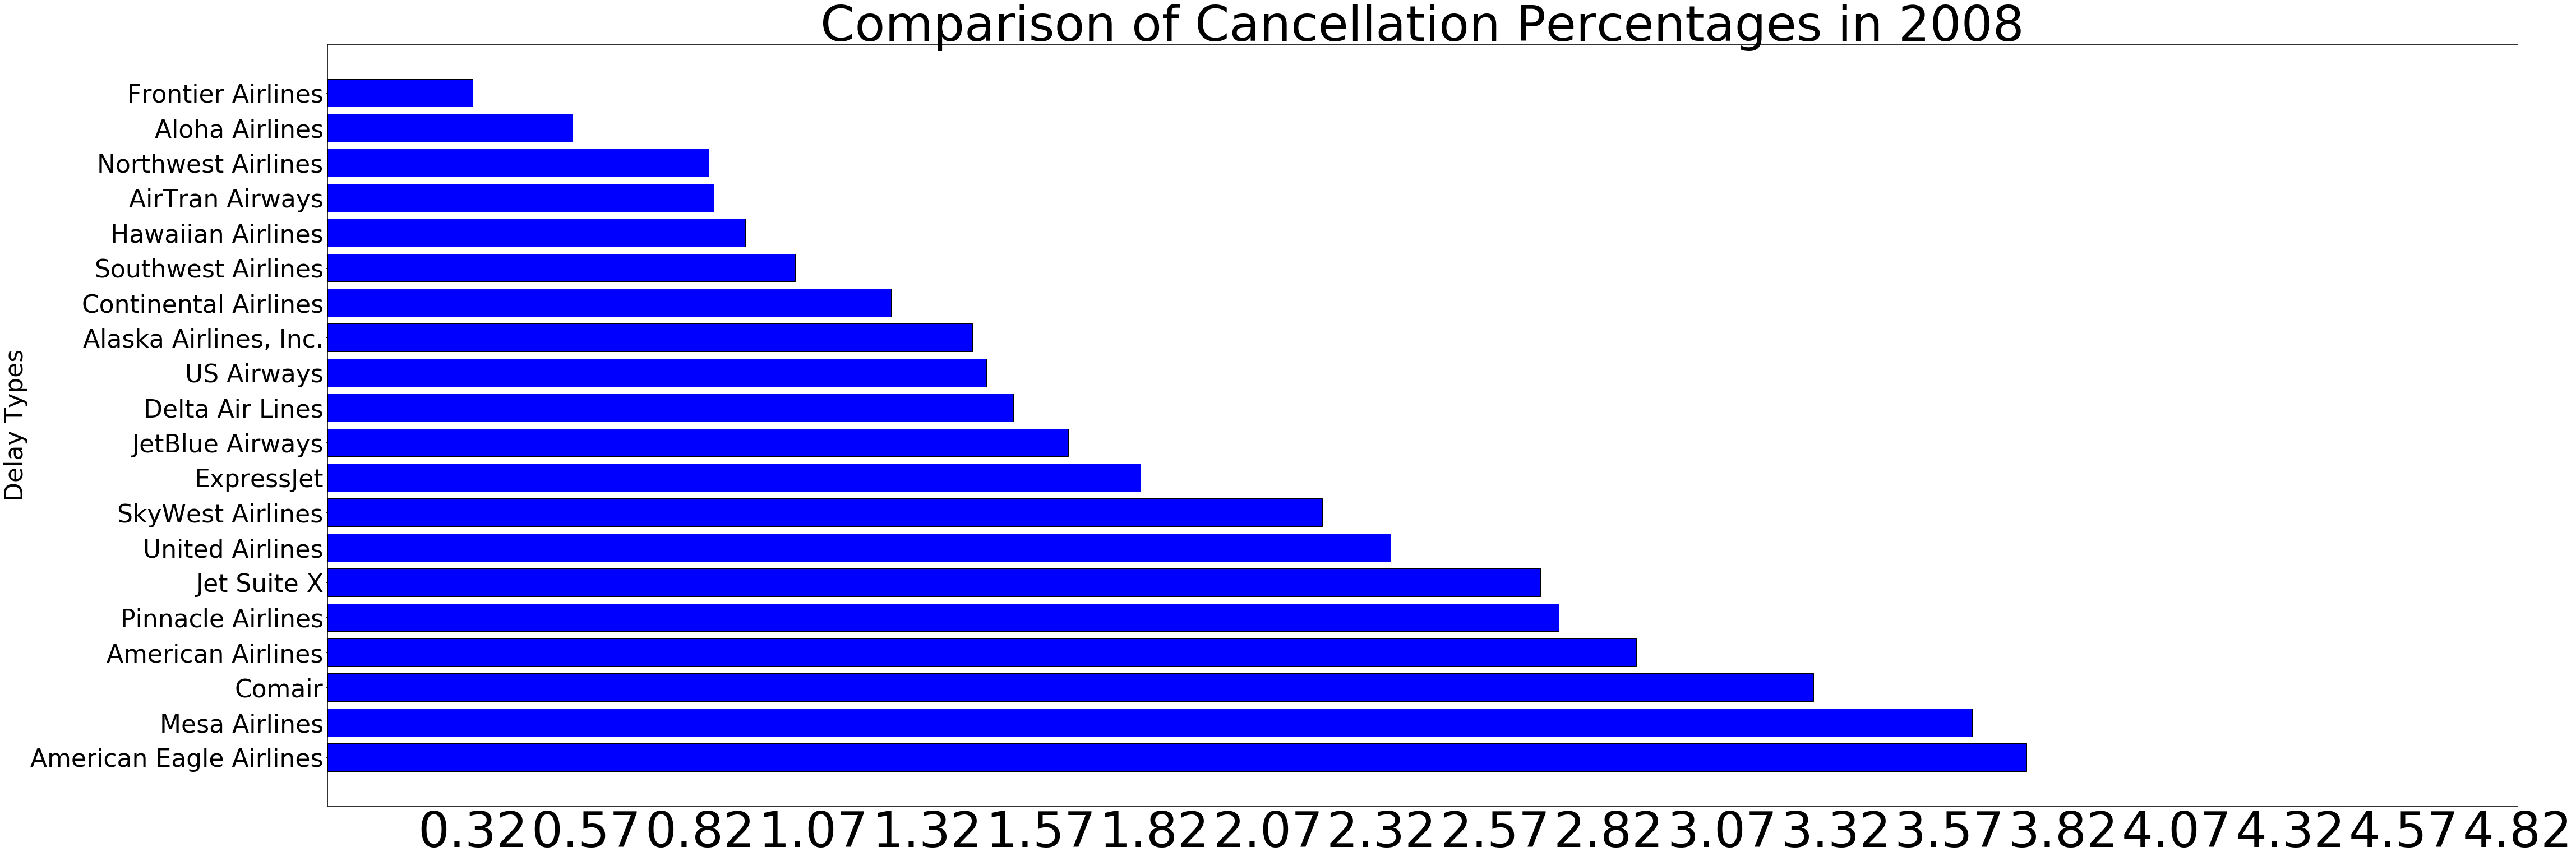

[0.32 0.57 0.82 1.07 1.32 1.57 1.82 2.07 2.32 2.57 2.82 3.07 3.32 3.57
 3.82 4.07 4.32 4.57 4.82]


In [18]:
plt.figure(figsize=(70, 25))
array1 = pd_cancelled_stat_by_airline['Airline']
Airline_types=pd.DataFrame(array1)

posy = np.arange(len(Airline_types))
array2 =pd_cancelled_stat_by_airline['Perc']
cancelled_perc = pd.DataFrame(array2)
posx = np.arange(min(array2), 5, .25)

plt.barh(posy,array2,color='blue',edgecolor='black')
plt.yticks(posy, array1, fontsize=44)
plt.ylabel('Delay Types', fontsize=44)
plt.xticks(posx,fontsize=88)

plt.title('Comparison of Cancellation Percentages in 2008',fontsize=88)
plt.show()
print(posx)

### The above table indicates even though other airlines have a better non-cancellaion percentage, Southwest, US Airways and Delta standout for their low cancellation rate despite their huge number of flights.

### An additional observation is that Southwest turns out to be the best in terms of on-time performance and low cancellation rate, despite having the highest volume of flights at roughly one and a quarter million flights. Southwest has always had a great reputation and a very good Wall street performance and the data shows the reason could be solid operational performance. 

## 3. The following is an analysis of the reason for highly delayed flights - arbitrarily defined as being more than an hour late. 

In [19]:
df_big_delay= pd.DataFrame(df[(df['TotDelay'] >60) ])

In [20]:
# print(len(df_big_delay[(df_big_delay['CarrierDelay'] >0)]),
# len(df_big_delay[(df_big_delay['WeatherDelay'] >0)]),
# len(df_big_delay[(df_big_delay['NASDelay'] >0)]),      
# len(df_big_delay[(df_big_delay['SecurityDelay'] >0)]),
# len(df_big_delay[(df_big_delay['LateAircraftDelay'] >0)]))

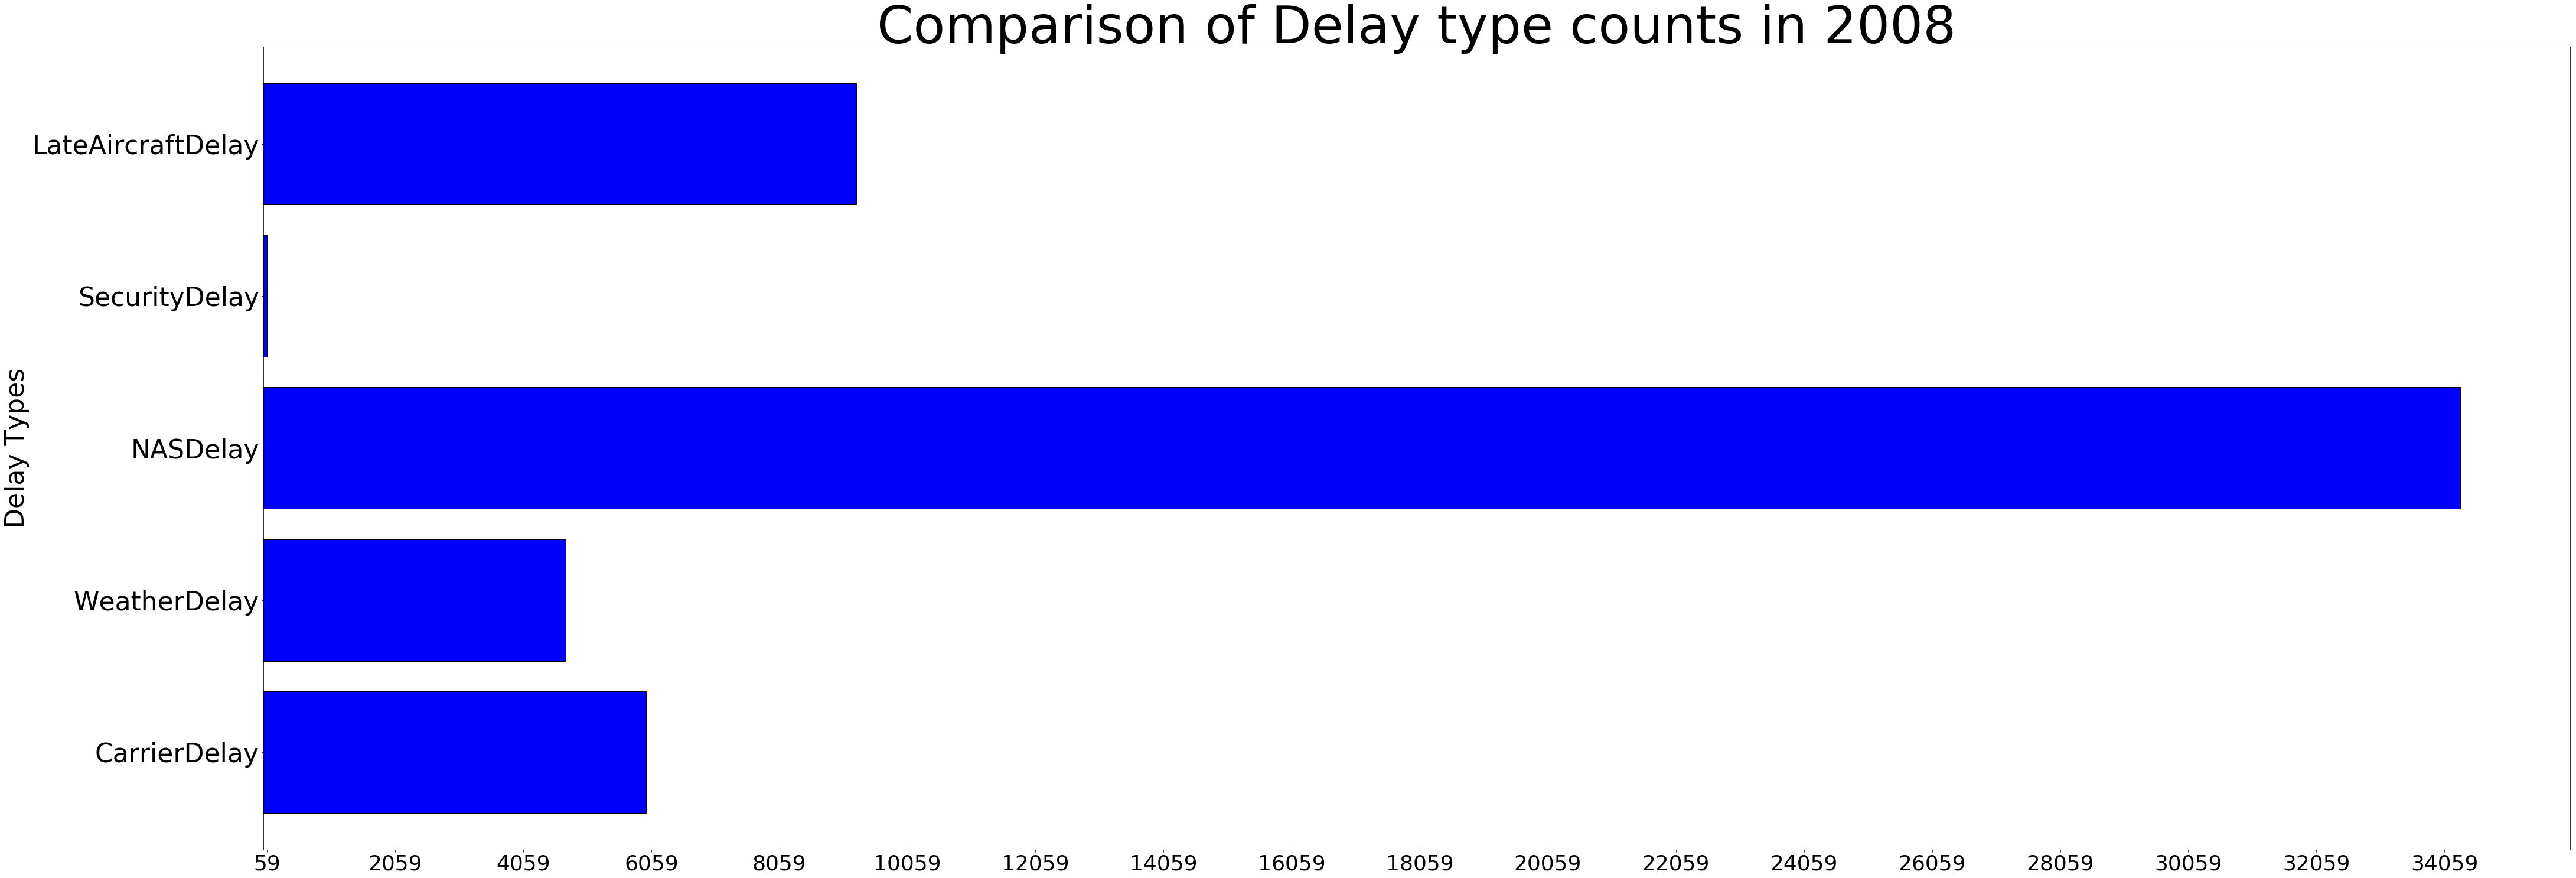

In [55]:
plt.figure(figsize=(70, 25))
array1 = np.array(['CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])
Delay_types=pd.DataFrame(array1)

posy = np.arange(len(Delay_types))
array2 =np.array([len(df_big_delay[(df_big_delay['CarrierDelay'] >0)]),
len(df_big_delay[(df_big_delay['WeatherDelay'] >0)]),
len(df_big_delay[(df_big_delay['NASDelay'] >0)]),      
len(df_big_delay[(df_big_delay['SecurityDelay'] >0)]),
len(df_big_delay[(df_big_delay['LateAircraftDelay'] >0)])])
Delay_counts = pd.DataFrame(array2)
posx = np.arange(min(array2),max(array2),2000)

plt.barh(posy,array2,color='blue',edgecolor='black')
plt.yticks(posy, array1, fontsize=44)
plt.ylabel('Delay Types',fontsize=44)
plt.xticks(posx,fontsize=36)

plt.title('Comparison of Delay type counts in 2008',fontsize=88)
plt.show()


#### Above graph indicates that major delays such as NASDelay and WeatherDelay for flights delayed by an hour or more are not preventable. So, we shift attention onto LateAircraftDelay and CarrierDelay. Let us see how different airlines fare on this reason.

In [56]:
df_big_delay_grp_coded = pd.DataFrame(df_big_delay.groupby('UniqueCarrier')['LateAircraftDelay','CarrierDelay'].quantile(.90).reset_index().sort_values('CarrierDelay'))

df_big_delay_grp = pd.merge(df_big_delay_grp_coded, df_al, on='UniqueCarrier')

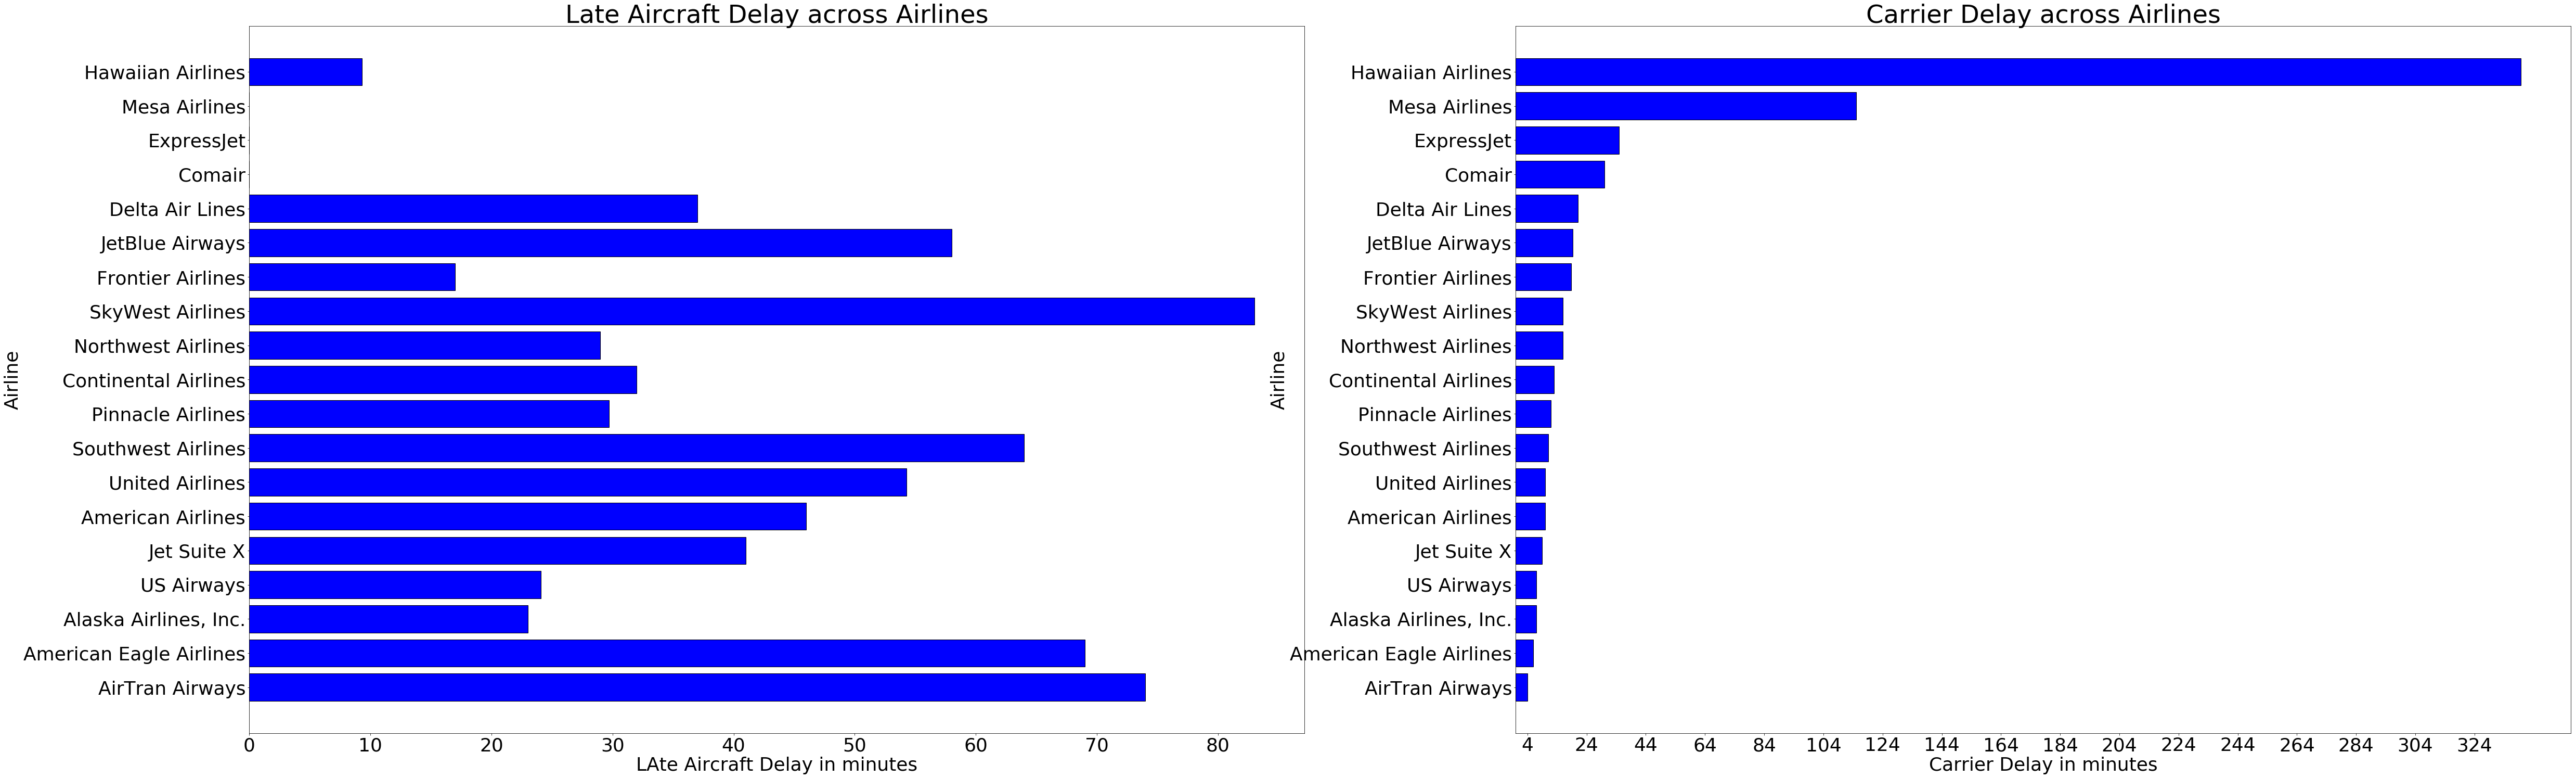

In [23]:
plt.figure(figsize=(80, 25))
Airlines=df_big_delay_grp['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
AircraftDelay=df_big_delay_grp['LateAircraftDelay']
xpos = np.arange(min(AircraftDelay),max(AircraftDelay)+1,10)
 
plt.subplot(1,2,1) 

plt.barh(pos,AircraftDelay,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=36)
plt.xticks(xpos,fontsize=36)
plt.xlabel('LAte Aircraft Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Late Aircraft Delay across Airlines',fontsize=48)


Airlines=df_big_delay_grp['Airline']
ypos = np.arange(len(Airlines))
CarrierDelay=df_big_delay_grp['CarrierDelay']
xpos = np.arange(min(CarrierDelay),max(CarrierDelay)+1,20)
 
plt.subplot(1,2,2)
plt.barh(pos,CarrierDelay,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=36)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Carrier Delay in minutes', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Carrier Delay across Airlines',fontsize=48)
plt.show()

#### Looking at the graph above, the resuts are a mixed bag. As a class we cannot say whether National/ International airlines are doing better or worse than Regional airlines. Southwest Airlines is middle of the pack! What could be the reason?

#### Let us examine the airlines from a different angle. TailNum indicates a unique aircraft. Let us counts how many unique aircrafts each airline has and how long are they kept in air on average and how many flights does each take on average

In [24]:
df_flight_count_byCarrier = pd.DataFrame(df.groupby('UniqueCarrier').count().reset_index())


In [25]:
df_flight_count_byCarrier

,UniqueCarrier,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotDelay,TimeInMotion
0,9E,262208,262208,262208,262208,262208,262208,262208,262208,262208,...,262208,262208,262208,262208,262208,262208,262208,262208,262208,262208
1,AA,604885,604885,604885,604885,604885,604885,604885,604885,604885,...,604885,604885,604885,604885,604885,604885,604885,604885,604885,604885
2,AQ,7800,7800,7800,7800,7800,7800,7800,7800,7800,...,7800,7800,7800,7800,7800,7800,7800,7800,7800,7800
3,AS,151102,151102,151102,151102,151102,151102,151102,151102,151102,...,151102,151102,151102,151102,151102,151102,151102,151102,151102,151102
4,B6,196091,196091,196091,196091,196091,196091,196091,196091,196091,...,196091,196091,196091,196091,196091,196091,196091,196091,196091,196091
5,CO,298455,298455,298455,298455,298455,298455,298455,298455,298455,...,298455,298455,298455,298455,298455,298455,298455,298455,298455,298455
6,DL,451931,451931,451931,451931,451931,451931,451931,451931,451931,...,451931,451931,451931,451931,451931,451931,451931,451931,451931,451931
7,EV,280575,280575,280575,280575,280575,280575,280575,280575,280575,...,280575,280575,280575,280575,280575,280575,280575,280575,280575,280575
8,F9,95762,95762,95762,95762,95762,95762,95762,95762,95762,...,95762,95762,95762,95762,95762,95762,95762,95762,95762,95762
9,FL,261684,261684,261684,261684,261684,261684,261684,261684,261684,...,261684,261684,261684,261684,261684,261684,261684,261684,261684,261684


In [26]:
df_flight_trunc_byCarrier1 = df_flight_count_byCarrier[['UniqueCarrier','Year']] 

In [27]:
df_flight_trunc_byCarrier2 = pd.DataFrame(df.groupby('UniqueCarrier')['TimeInMotion'].sum().reset_index())

In [28]:
df_flight_trunc_byCarrier1

,UniqueCarrier,Year
0,9E,262208
1,AA,604885
2,AQ,7800
3,AS,151102
4,B6,196091
5,CO,298455
6,DL,451931
7,EV,280575
8,F9,95762
9,FL,261684


In [29]:
df_flight_trunc_byCarrier = pd.DataFrame(pd.merge(df_flight_trunc_byCarrier1,df_flight_trunc_byCarrier2,on='UniqueCarrier'))

In [57]:
df_flight_trunc_byCarrier

,UniqueCarrier,Year,TimeInMotion
0,9E,262208,24850306.0
1,AA,604885,97715527.0
2,AQ,7800,572361.0
3,AS,151102,22743026.0
4,B6,196091,34251031.0
5,CO,298455,54153357.0
6,DL,451931,69330478.0
7,EV,280575,25811323.0
8,F9,95762,13701065.0
9,FL,261684,32813549.0


In [31]:
df_tailcount_bycarrier = pd.DataFrame(df.groupby(['UniqueCarrier'])['TailNum'].nunique().reset_index())

df_merged = pd.DataFrame(pd.merge(df_tailcount_bycarrier,df_flight_trunc_byCarrier,on='UniqueCarrier'))

df_merged['FlightsPerPlane']= df_merged['Year']/df_merged['TailNum']
df_merged['HoursPerPlane']= df_merged['TimeInMotion']/df_merged['TailNum']

df_aircraft_stat = pd.DataFrame(pd.merge(df_merged,df_al,on='UniqueCarrier'))

In [32]:
df_aircraft_stat.rename(columns={'TailNum': 'Plane_count'}, inplace=True)
df_aircraft_stat.rename(columns={'Year': 'Flight_count'}, inplace=True)

In [33]:
df_aircraft_stat

,UniqueCarrier,Plane_count,Flight_count,TimeInMotion,FlightsPerPlane,HoursPerPlane,Airline
0,9E,162,262208,24850306.0,1618.567901,153396.950617,Pinnacle Airlines
1,AA,656,604885,97715527.0,922.080793,148956.596037,American Airlines
2,AQ,21,7800,572361.0,371.428571,27255.285714,Aloha Airlines
3,AS,126,151102,22743026.0,1199.222222,180500.206349,"Alaska Airlines, Inc."
4,B6,154,196091,34251031.0,1273.318182,222409.292208,JetBlue Airways
5,CO,378,298455,54153357.0,789.563492,143262.849206,Continental Airlines
6,DL,461,451931,69330478.0,980.327549,150391.492408,Delta Air Lines
7,EV,163,280575,25811323.0,1721.319018,158351.674847,ExpressJet
8,F9,63,95762,13701065.0,1520.031746,217477.222222,Frontier Airlines
9,FL,142,261684,32813549.0,1842.845070,231081.330986,AirTran Airways


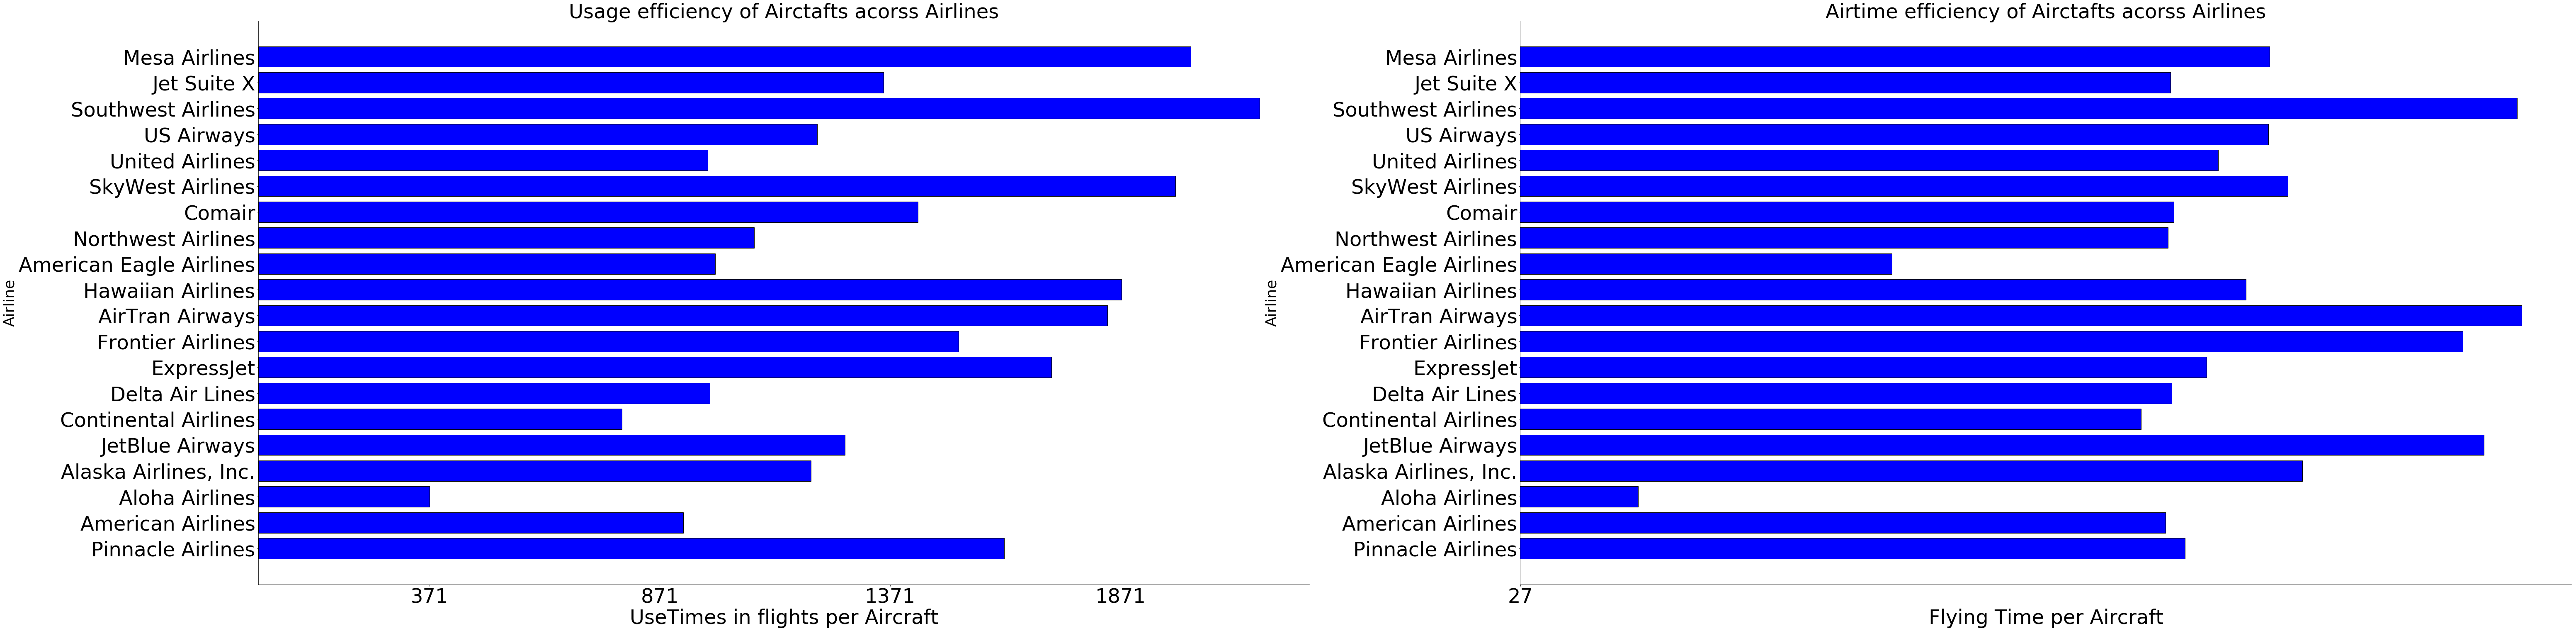

In [34]:
plt.figure(figsize=(100, 25))
Airlines=df_aircraft_stat['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
useTimes=df_aircraft_stat['FlightsPerPlane']
xpos = np.arange(min(useTimes),max(useTimes)+1,500)
 
plt.subplot(1,2,1) 

plt.barh(pos,useTimes,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=48)
plt.xlabel('UseTimes in flights per Aircraft', fontsize=48)
plt.ylabel('Airline', fontsize=36)
plt.title('Usage efficiency of Airctafts acorss Airlines',fontsize=48)


Airlines=df_aircraft_stat['Airline']
ypos = np.arange(len(Airlines))
hoursperTail=df_aircraft_stat['HoursPerPlane']
xpos = np.arange(min(hoursperTail)/1000,max(hoursperTail)/1000+1,500)
 
plt.subplot(1,2,2)
plt.barh(pos,hoursperTail,color='blue',edgecolor='black')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=48)
plt.xlabel('Flying Time per Aircraft', fontsize=48)
plt.ylabel('Airline', fontsize=36)
plt.title('Airtime efficiency of Airctafts acorss Airlines',fontsize=48)
plt.show()

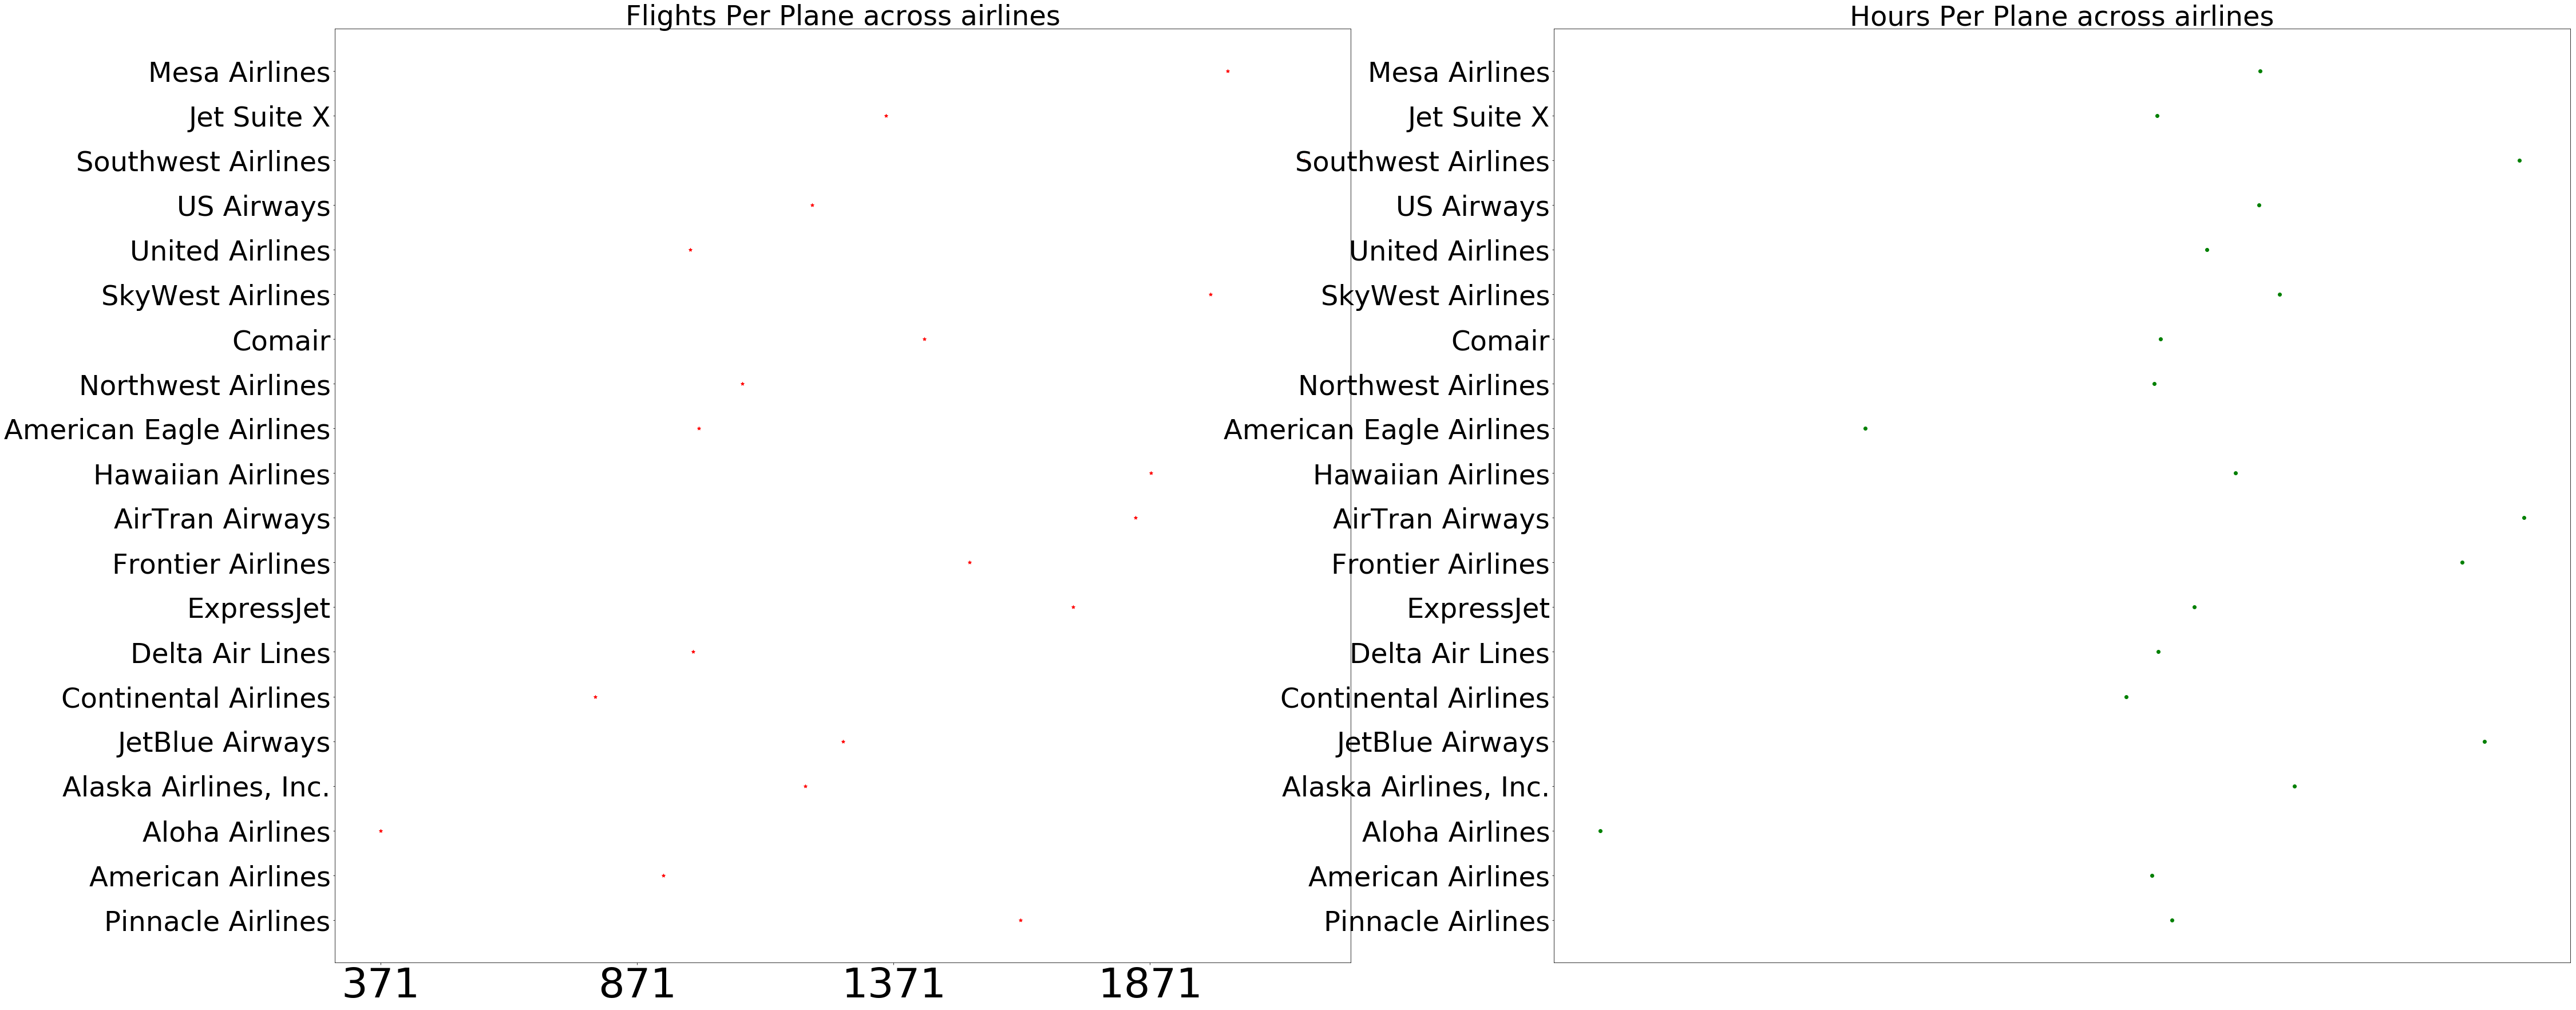

In [58]:
plt.figure(figsize=(70, 30))
ypos = np.arange(len(Airlines))
plt.subplot(1,2,1)
useTimes=df_aircraft_stat['FlightsPerPlane']
xpos = np.arange(min(useTimes),max(useTimes)+1,500)
plt.scatter(x=df_aircraft_stat['FlightsPerPlane'],y=df_aircraft_stat['Airline'],color='red',marker='*')
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=72)
plt.title('Flights Per Plane across airlines',fontsize=48) 

plt.subplot(1,2,2)
plt.scatter(x=df_aircraft_stat['HoursPerPlane'], y=df_aircraft_stat['Airline'],color='green')
hoursperTail=df_aircraft_stat['HoursPerPlane']
xpos = np.arange(min(hoursperTail)/1000,max(hoursperTail)/1000+1,500)
plt.yticks(ypos, Airlines, fontsize=48)
plt.xticks(xpos,fontsize=72)
plt.title('Hours Per Plane across airlines',fontsize=48)
plt.show()

In [59]:
df_aircraft_stat

,UniqueCarrier,Plane_count,Flight_count,TimeInMotion,FlightsPerPlane,HoursPerPlane,Airline
0,9E,162,262208,24850306.0,1618.567901,153396.950617,Pinnacle Airlines
1,AA,656,604885,97715527.0,922.080793,148956.596037,American Airlines
2,AQ,21,7800,572361.0,371.428571,27255.285714,Aloha Airlines
3,AS,126,151102,22743026.0,1199.222222,180500.206349,"Alaska Airlines, Inc."
4,B6,154,196091,34251031.0,1273.318182,222409.292208,JetBlue Airways
5,CO,378,298455,54153357.0,789.563492,143262.849206,Continental Airlines
6,DL,461,451931,69330478.0,980.327549,150391.492408,Delta Air Lines
7,EV,163,280575,25811323.0,1721.319018,158351.674847,ExpressJet
8,F9,63,95762,13701065.0,1520.031746,217477.222222,Frontier Airlines
9,FL,142,261684,32813549.0,1842.845070,231081.330986,AirTran Airways


### The above graphs indicate potential reason for subpar performance regarding Airline delays(Carrier + LateAircraft)  for Southwest. Southwest keeps its aircrafts on more flights than any other airline and it keeps them for more time in air than any other airline. For this reason, any delay of an hour or more, likely disrupts its operations more, thus causing more delays than a few other airlines.

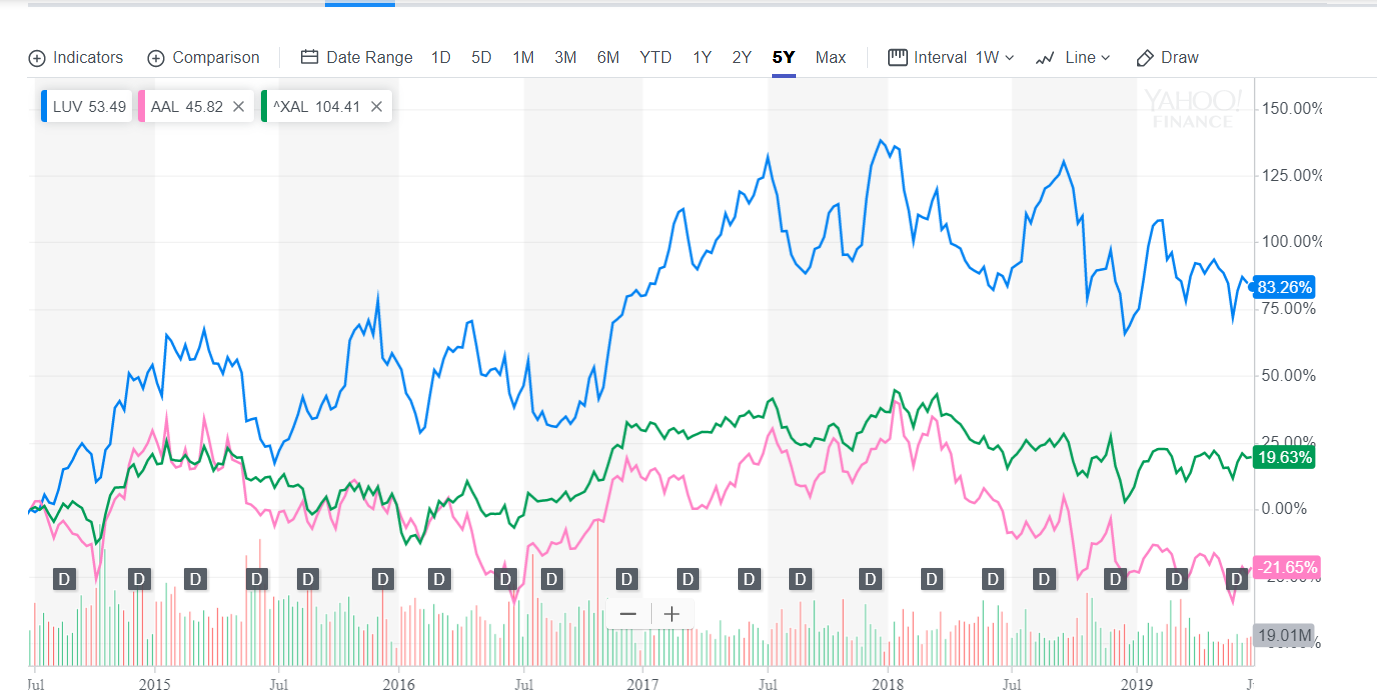

## I would like to do analysis across the years to study improvement in performance among different airlines, but the datasets are huge. 
## Another analysis I would like to do is how the same tail number is used in a given day, month etc., . 
## A comparison that would be interesting is the analysis of airlines based on the distance traveled in each leg and find statistics based on total airline miles rather than total flights.

In [60]:
df_aircraft_stat.sort_values('count',=[False])

KeyError: 'Year'

In [ ]:

fig =plt.figure(figsize=(80, 40))



Airlines=df_aircraft_stat['Airline']
ypos = np.arange(len(Airlines))
pos=ypos
tailCount=df_aircraft_stat['TailNum']
xpos = np.arange(min(tailCount),max(tailCount)+1,100)
 
flightCount=df_aircraft_stat['Year']    


plt.barh(pos,tailCount,color='blue',edgecolor='black',ax=ax)
plt.barh(pos+.25,flightCount,color='red',edgecolor='black',ax=ax)
plt.yticks(ypos, Airlines, fontsize=44)
plt.xticks(xpos,fontsize=36)
plt.xlabel('Number of aircrafts for each Airline', fontsize=36)
plt.ylabel('Airline', fontsize=36)
plt.title('Aircraft Statistics by airline',fontsize=48)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_aircraft_stat['Plane_count'], labels=df_aircraft_stat['Airline'], 
autopct='%2.1f%%', shadow=True, startangle=0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_aircraft_stat['Flight_count'], labels=df_aircraft_stat['Airline'], 
autopct='%1.1f%%', shadow=True, startangle=0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(df_aircraft_stat['HoursPerPlane'], labels=df_aircraft_stat['Airline'], 
autopct='%1.1f%%', shadow=True, startangle=0)
plt.show()